In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Question 1. Read in data

In [94]:
credit = pd.read_csv('credit_scoring_data.csv')

# Question 2. Create histogram for each variable

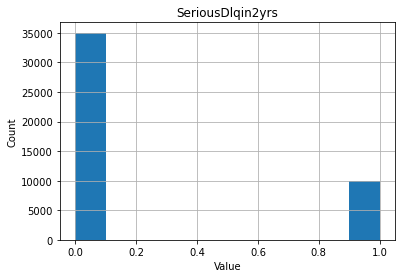

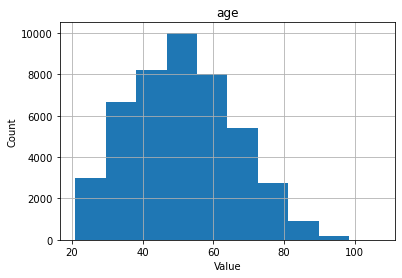

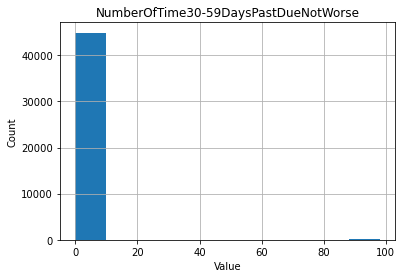

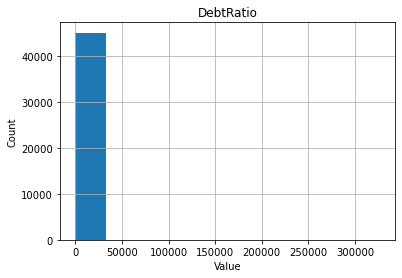

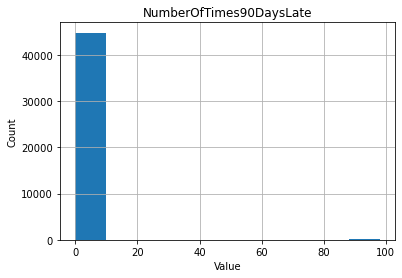

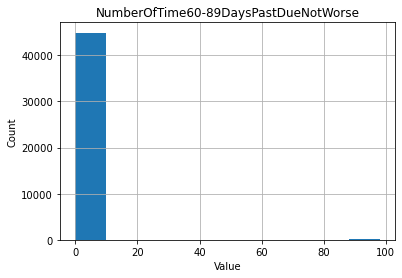

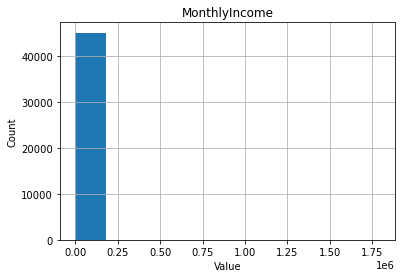

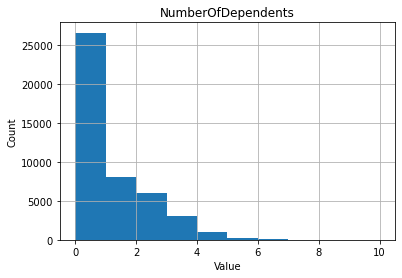

In [95]:
for x in credit.columns:
    credit[x].hist()
    plt.title(x)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

In [96]:
#scaling data
credit_scaled = (credit - credit.min()) / (credit.max() - credit.min())

In [97]:
credit_scaled

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0.0,0.500000,0.000000,7.655510e-07,0.0,0.0,0.004547,0.0
1,0.0,0.430233,0.000000,1.185509e-02,0.0,0.0,0.002880,0.0
2,0.0,0.232558,0.000000,1.397268e-06,0.0,0.0,0.003716,0.0
3,0.0,0.255814,0.000000,5.820329e-10,0.0,0.0,0.005853,0.2
4,1.0,0.325581,0.000000,8.326747e-07,0.0,0.0,0.000223,0.0
...,...,...,...,...,...,...,...,...
45058,1.0,0.116279,0.000000,2.526406e-06,0.0,0.0,0.001672,0.1
45059,0.0,0.325581,0.000000,2.000355e-02,0.0,0.0,0.000000,0.5
45060,1.0,0.197674,0.000000,1.457659e-06,0.0,0.0,0.001672,0.2
45061,0.0,0.302326,0.010204,1.486322e-06,0.0,0.0,0.006533,0.5


# Question 3. Run kmeans clustering at values 2-20.

In [31]:
krange = range(2,21)
inertias=[]
silhouette=[]
for x in krange:
    cluster_model = KMeans(n_clusters = x, random_state = 13).fit(credit_scaled)
                           
    inertias.append(cluster_model.inertia_)
    silhouette.append(metrics.silhouette_score(credit_scaled, labels = cluster_model.labels_))

In [32]:
inertias

[2355.8736833358726,
 1609.902059623555,
 1112.3076630867097,
 860.5770327103913,
 707.4654164416609,
 560.0280681103977,
 467.3776338522958,
 404.5087754702512,
 365.36292256599955,
 334.16617827694085,
 304.3911337120954,
 276.97828336301995,
 253.01758763855338,
 239.0872831584244,
 222.73450229256494,
 211.87117486496268,
 198.40492366432647,
 184.24314304206297,
 173.2267144676005]

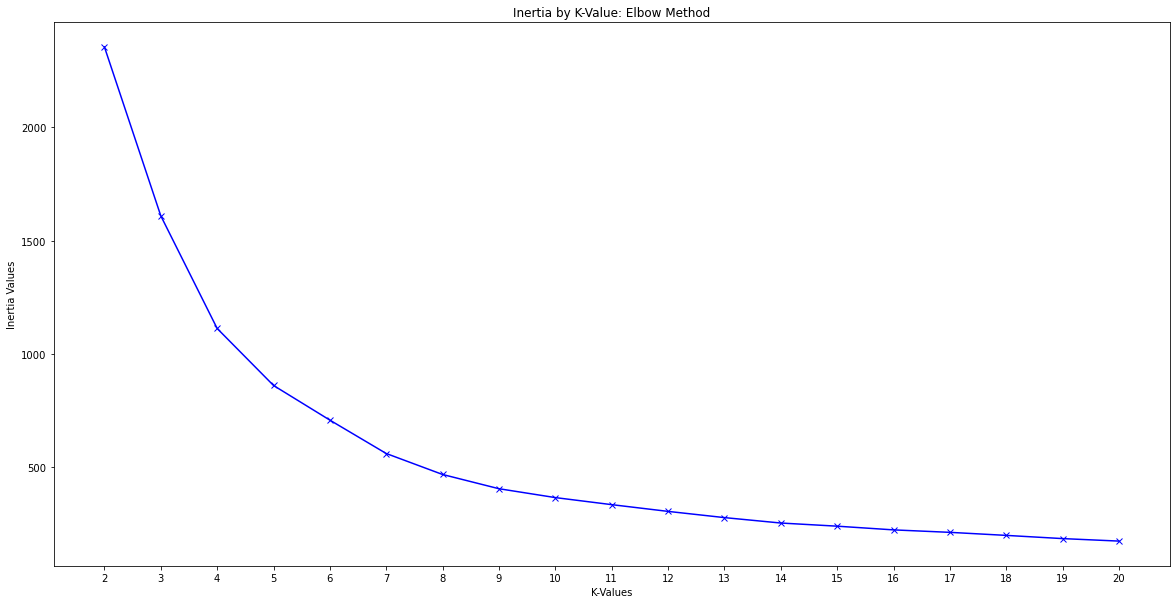

In [41]:
plt.figure(figsize=(20,10))
plt.plot(krange, inertias, 'bx-')
plt.title('Inertia by K-Value: Elbow Method')
plt.xlabel('K-Values')
plt.ylabel('Inertia Values')
plt.xticks(ticks=krange)
plt.show()

In [42]:
for x, y in zip(krange, silhouette):
    print(x, ":", y)

2 : 0.7570104603359598
3 : 0.5113079755199409
4 : 0.5204615478201358
5 : 0.5416761023988232
6 : 0.4580892746467516
7 : 0.43247593504332954
8 : 0.44800534331237096
9 : 0.4337660344684349
10 : 0.4313992493796032
11 : 0.4401501227376968
12 : 0.43337314136280675
13 : 0.43112576982424156
14 : 0.4157530777587322
15 : 0.4097975078182583
16 : 0.42763438743163346
17 : 0.42035876625229024
18 : 0.4071036828814926
19 : 0.42973854679257295
20 : 0.42410892870863215


# Q3. A) Optimal value for elbow and silhouette methods.
# Q3. B) Which to use in a business setting

### From running the clustering models above, I see that the optimal k-value by the elbow method is 4, while the optimal k-value for the silhouette value is 2. I chose 4 for the elbow method because I believe the greatest change in slope happens at K-Value=4 in the graph. For the silhouette method, the K-value of 2 gave a silhouette score of .757, the closest value to 1. As these values are different, there is a discrepancy between which is the best K-value to use for this dataset.

### With this discrepancy, in a business setting, I would choose to use a K-Value of 4. This is because the point of clustering with this dataset is to group people who are similar regarding their income, debt payments, # of depdendents, etc. By having a larger number of groups, we would be able to segment people into more groups, which could be beneficial for someone like a mortgage lender. If a mortgage lender were to have this model with only two groups, those groups could be seen by the lender as "good to give a loan" and "bad to give a loan." The lender would probably want a more detailed view and be able to apply it to new loan applicants and see if maybe they're a great, good, okay, or bad loan applicant. Through using more groups, the lender could differentiate better between applicants and may have an increase in customers than by using the 2 group method, where an "okay" applicant would be grouped with the "bad" applicants. 

# Question 4. Using the optimal K-value, find the mean of each variable & number of obs. in each cluster.

In [99]:
cluster_model = KMeans(n_clusters = 4, random_state = 13).fit(credit_scaled)
creditwcluster = credit
creditwcluster["KMeans_Cluster"] = cluster_model.labels_

In [100]:
#The number of observations in each cluster at K=4
creditwcluster['KMeans_Cluster'].value_counts(sort=True)

2    18426
0    16580
1     9879
3      178
Name: KMeans_Cluster, dtype: int64

In [101]:
#The mean of each variable at K=4
creditwcluster.groupby(creditwcluster.KMeans_Cluster).mean()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
KMeans_Cluster,,,,,,,,
0,0.000000,65.375030,0.159409,461.673528,0.031423,0.027021,6497.472678,0.270808
1,1.000000,46.056180,0.966596,299.380947,0.665047,0.397814,5582.654418,0.939468
2,0.000000,41.377564,0.228807,285.006668,0.064745,0.053403,6301.562683,1.132639
3,0.825843,35.893258,97.943820,7.508862,97.943820,97.943820,3648.522472,0.337079
